## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [1]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x):
    x=x.reshape((len(x), -1))
    x=x/(x.max()-x.min())
    return x
def preproc_y(y,num_classes=10):
    if y.shape[-1] == 1:  #[-1]表示從後面數來第一項
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [14]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape,output_units=10, num_neurons=[512, 256, 128,64,32]):
    input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [17]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256

In [18]:
model = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [19]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 27s 543us/step - loss: 2.0027 - acc: 0.2663 - val_loss: 1.8160 - val_acc: 0.3367
Epoch 2/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.7669 - acc: 0.3609 - val_loss: 1.6834 - val_acc: 0.3920
Epoch 3/50
50000/50000 [==============================] - 21s 425us/step - loss: 1.6742 - acc: 0.3970 - val_loss: 1.6037 - val_acc: 0.4305
Epoch 4/50
50000/50000 [==============================] - 22s 438us/step - loss: 1.5941 - acc: 0.4307 - val_loss: 1.6265 - val_acc: 0.4199
Epoch 5/50
50000/50000 [==============================] - 22s 435us/step - loss: 1.5385 - acc: 0.4490 - val_loss: 1.5171 - val_acc: 0.4611
Epoch 6/50
50000/50000 [==============================] - 22s 434us/step - loss: 1.5035 - acc: 0.4615 - val_loss: 1.5173 - val_acc: 0.4593
Epoch 7/50
50000/50000 [==============================] - 22s 432us/step - loss: 1.4618 - acc: 0.4780 - val_loss: 1.

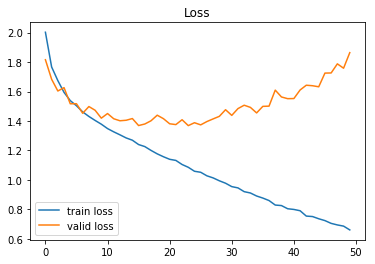

Text(0.5,1,'Accuracy')

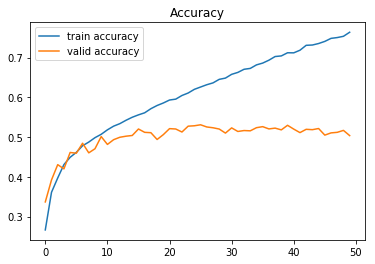

In [22]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
#plt.show()